In [2]:
#############################################################################
#
# Tutorial of coordinate transformation applied in cosmology
# Author     : P.Ntelis 
# date       : 7 July 2023
# Comment 0:
# code found in repository: 
# https://github.com/lontelis/Tutorial-of-coordinate-transformation-applied-in-cosmology
# Comment 1
# dependences: cosmopit
# details found in: https://github.com/lontelis/cosmopit
# to get cosmopit just perform the following command in a terminal: 
# git clone https://github.com/lontelis/cosmopit.git
# Comment 2
# The tutorial is dedicated to a workshop during the conference of Cosmology from Home
# details found in: https://cosmologyfromhome.com/
#
#############################################################################

In [3]:
print('# import important modules')
import matplotlib.pyplot as plt
import numpy as np
import cosmopit
from cosmopit import galtools

# import important modules
# Authors: P.Ntelis
# original code taken from J.C.Hamilton in June 2014
# fancy matplotlib libraries
# credit: https://stackoverflow.com/questions/53122592/legend-with-vertical-line-in-matplotlib


In [4]:

print('# Fixing random state for reproducibility')
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

n = 200
print('# producing random points in a 3D cartesian coordinate system')
xs = randrange(n, -1000, 1000)
ys = randrange(n, -1000, 1000)
zs = randrange(n, -1000, 1000)

# Fixing random state for reproducibility
# producing random points in a 3D cartesian coordinate system


In [5]:
print('# transform: x,y,z cartesian coordinates to radius, theta, phi spherical coordinates')
rs,ths,phs = galtools.xyz2rthph(xs,ys,zs)
print('# cosmology for homogeneous and isotropic universe')
print('# define cosmological parameters          ')
print(' Om  OL   w0  w1')
cosmopars=[0.3,0.7,-1.0,0.0]
print('# transform:  radius, theta, phi spherical coordinates to redshift (z), DEC, RA')
reds,decs,ras = np.zeros(len(xs)),np.zeros(len(xs)),np.zeros(len(xs))
for i in range(len(xs)):
	reds[i],decs[i],ras[i] = galtools.rthph2zdecra(rs[i],ths[i],phs[i],drho=0.0,dtheta=0.0,dphi=0.0,params=cosmopars)
print('# transform:  xyz cartesian coordinates to redshift (z), DEC, RA')
redsd,decsd,rasd = np.zeros(len(xs)),np.zeros(len(xs)),np.zeros(len(xs))
for i in range(len(xs)):
	redsd[i],decsd[i],rasd[i] = galtools.xyz2zdecra(xs[i],ys[i],zs[i],drho=0.0,dtheta=0.0,dphi=0.0,params=cosmopars)

print('# inverse transform: redshift (z), DEC, RA to radius, theta and phi spherical coordinates')
rsi,thsi,phsi = np.zeros(len(xs)),np.zeros(len(xs)),np.zeros(len(xs))
for i in range(len(xs)):
	rsi[i],thsi[i],phsi[i] = galtools.zdecra2rthph(reds[i],decs[i],ras[i],params=cosmopars,dist_type='proper')

print('# inverse transform:  radius, theta, phi spherical coordinates to cartesian coordinates x,y,z')
xsi, ysi, zsi = galtools.rthph2xyz(rs,ths,phs)

print('# inverse tansform: ')
xsid, ysid, zsid = np.zeros(len(xs)),np.zeros(len(xs)),np.zeros(len(xs))
for i in range(len(xs)):
	xsid[i], ysid[i], zsid[i] = galtools.zdecra2xyz(reds[i],decs[i],ras[i],params=cosmopars,dist_type='proper')


# transform: x,y,z cartesian coordinates to radius, theta, phi spherical coordinates
# cosmology for homogeneous and isotropic universe
# define cosmological parameters          
 Om  OL   w0  w1
# transform:  radius, theta, phi spherical coordinates to redshift (z), DEC, RA
# transform:  xyz cartesian coordinates to redshift (z), DEC, RA
# inverse transform: redshift (z), DEC, RA to radius, theta and phi spherical coordinates
# inverse transform:  radius, theta, phi spherical coordinates to cartesian coordinates x,y,z
# inverse tansform: 


In [6]:
print('# tests of the routines of transformations:')
print("test 1) test_xyz2zdecra_zdecra2xyz")
galtools.test_xyz2zdecra_zdecra2xyz(x=xs, y=ys, z=zs, rtol=1e-4)
print("test 2) test_zdecra2rthph_rthph2zdecra")
galtools.test_zdecra2rthph_rthph2zdecra(z=reds,dec=decs,ra=ras,rtol=1e-3)
print("test 3) test_xyz2rthph_rthph2xyz")
galtools.test_xyz2rthph_rthph2xyz(x=xs, y=ys, z=zs,rtol=1e-3)
print("test 4) test_rthph2xyz_xyz2rthph")
for i in range(len(xs)):
	galtools.test_rthph2xyz_xyz2rthph(r=rs[i],th=ths[i],ph=phs[i])

# tests of the routines of transformations:
test 1) test_xyz2zdecra_zdecra2xyz
[ 400.77731818  485.50548121  418.63047303  133.49981457  955.65671817
  412.7125753  -504.25030976 -684.30086019  395.40122412  439.92817018
 -484.56716848 -316.93962873  937.5297184   389.01933311  -67.23964865
  405.67842867   23.57556854  857.53067241  479.547231    244.88438867
  303.11528611 -206.41591929   86.48544157  599.88011896  443.12730429
 -409.33068507 -678.1336614  -587.79339878 -731.35393674  -38.79167279
 -314.98188891 -274.08243104  945.86130211 -778.16327915 -223.494841
  566.18346486  945.80471072  -33.58326069 -327.20601661  134.84018266
 -904.14898603 -222.15599018  812.6663332  -678.04667552  487.28296232
  265.96851652 -351.65215131  844.8160121  -525.57734718  647.93198466
  501.2544542  -772.50057935  690.76957839  847.93437476 -558.3484232
  866.12335555  -22.00680933  -50.56905076 -821.67124408 -540.11718108
  431.87677336   -7.74801376  533.00503226  793.64819659  544.50097512
 

# Plotting functions


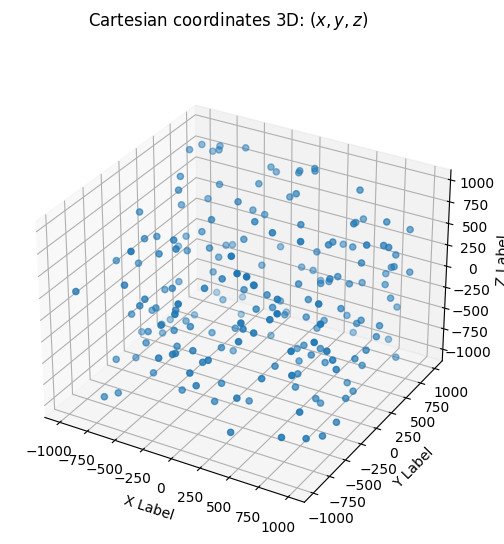

(None, <contextlib.ExitStack at 0x11e3516d0>)

In [7]:
print('# Plotting functions')


plt.ion()
fig = plt.figure(1,figsize=(10,6))
plt.suptitle('Cartesian coordinates 3D: $(x,y,z)$')
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show(),plt.ion()

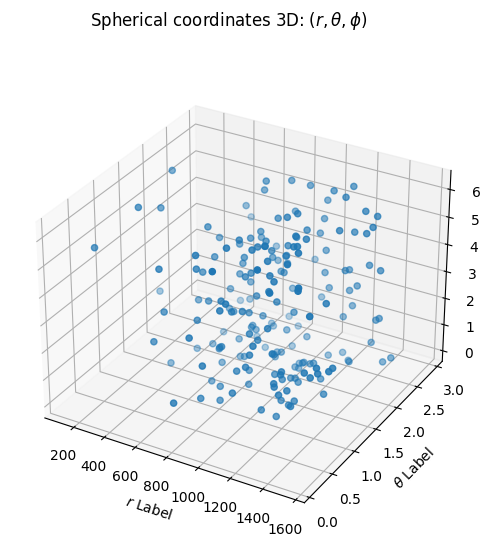

(None, <contextlib.ExitStack at 0x11f03e430>)

In [8]:
fig = plt.figure(2,figsize=(10,6))
plt.suptitle('Spherical coordinates 3D: $(r,\\theta,\\phi)$')
ax = fig.add_subplot(projection='3d')
ax.scatter(rs, ths, phs, marker='o')
ax.set_xlabel('$r$ Label')
ax.set_ylabel('$\\theta$ Label')
ax.set_zlabel('$\\phi$ Label')
plt.show(),plt.ion()

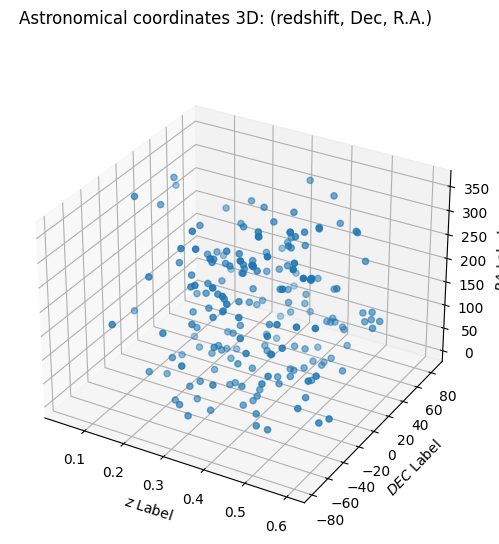

(None, <contextlib.ExitStack at 0x11f330310>)

In [9]:
fig = plt.figure(3,figsize=(10,6))
plt.suptitle('Astronomical coordinates 3D: (redshift, Dec, R.A.) ')
ax = fig.add_subplot(projection='3d')
ax.scatter(reds, decs, ras, marker='o')
ax.set_xlabel('$z$ Label')
ax.set_ylabel('$DEC$ Label')
ax.set_zlabel('$RA$ Label')
plt.show(),plt.ion()

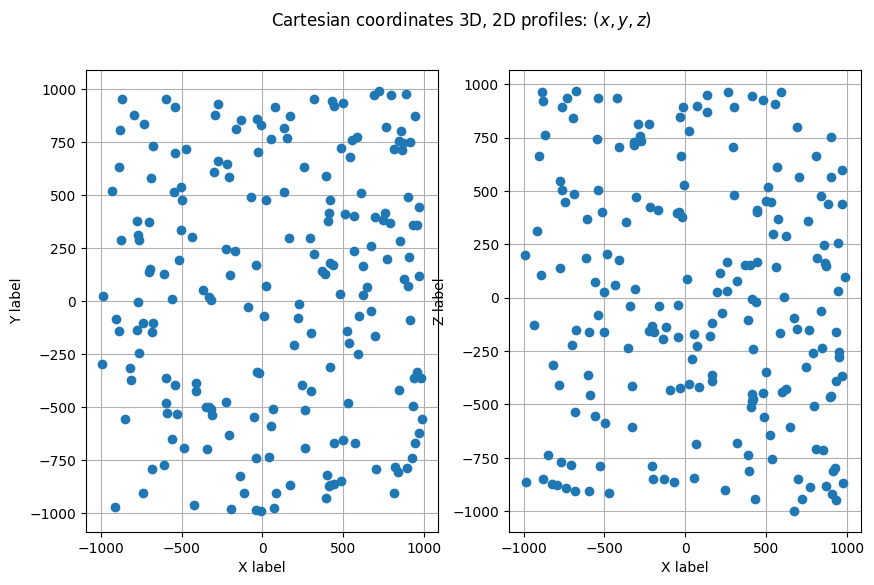

In [10]:
plt.figure(4,figsize=(10,6))
plt.clf()
plt.suptitle('Cartesian coordinates 3D, 2D profiles: $(x,y,z)$')
plt.subplot(121)
plt.plot(xs,ys,'o')
plt.grid()
plt.xlabel('X label')
plt.ylabel('Y label')
plt.subplot(122)
plt.plot(xs,zs,'o')
plt.grid()
plt.xlabel('X label')
plt.ylabel('Z label')
plt.show()

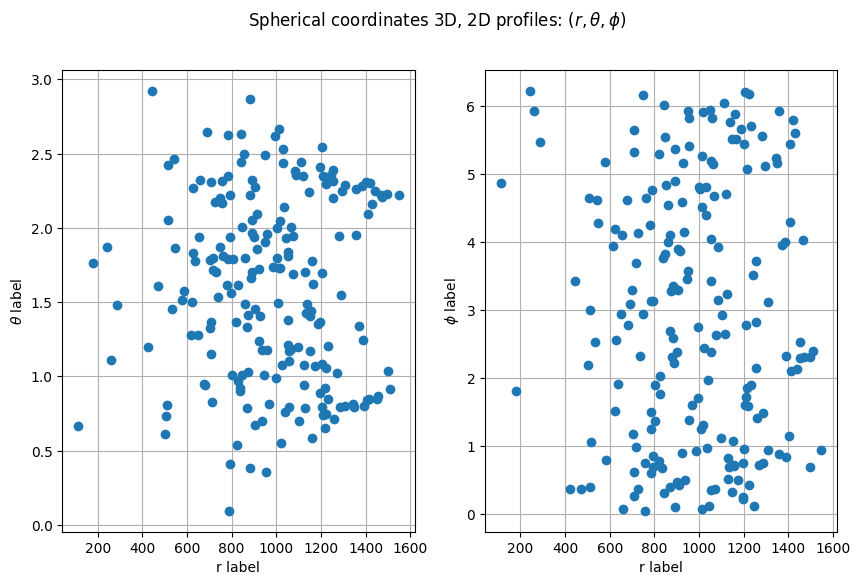

In [11]:
plt.figure(5,figsize=(10,6))
plt.clf()
plt.suptitle('Spherical coordinates 3D, 2D profiles: $(r,\\theta,\\phi)$')
plt.subplot(121)
plt.plot(rs,ths,'o')
plt.grid()
plt.xlabel('r label')
plt.ylabel('$\\theta$ label')
plt.subplot(122)
plt.plot(rs,phs,'o')
plt.grid()
plt.xlabel('r label')
plt.ylabel('$\\phi$ label')
plt.show()

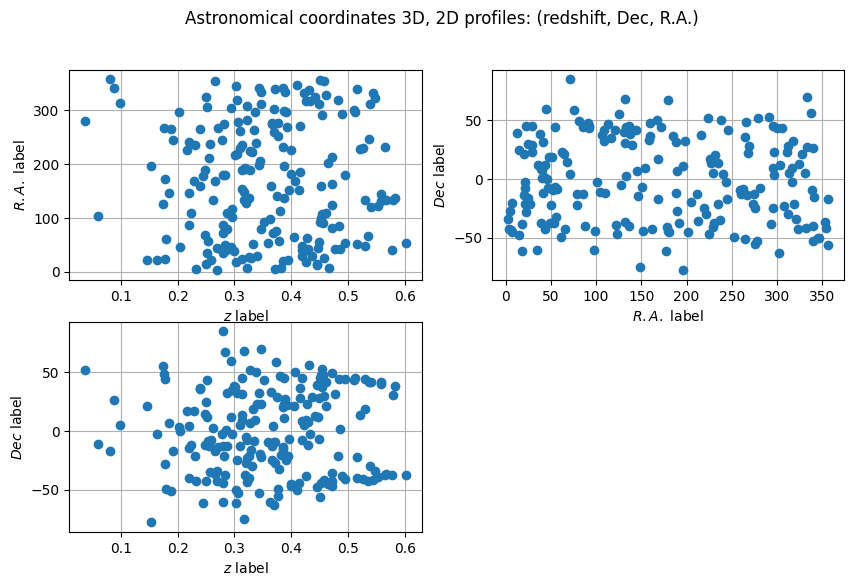

In [12]:
plt.figure(6,figsize=(10,6))
plt.clf()
plt.suptitle('Astronomical coordinates 3D, 2D profiles: (redshift, Dec, R.A.) ')
plt.subplot(221)
plt.plot(reds,ras,'o')
plt.grid()
plt.xlabel('$z$ label')
plt.ylabel('$R.A.$ label')
plt.subplot(222)
plt.plot(ras,decs,'o')
plt.grid()
plt.xlabel('$R.A.$ label')
plt.ylabel('$Dec$ label')
plt.subplot(223)
plt.plot(reds,decs,'o')
plt.grid()
plt.xlabel('$z$ label')
plt.ylabel('$Dec$ label')
plt.show()

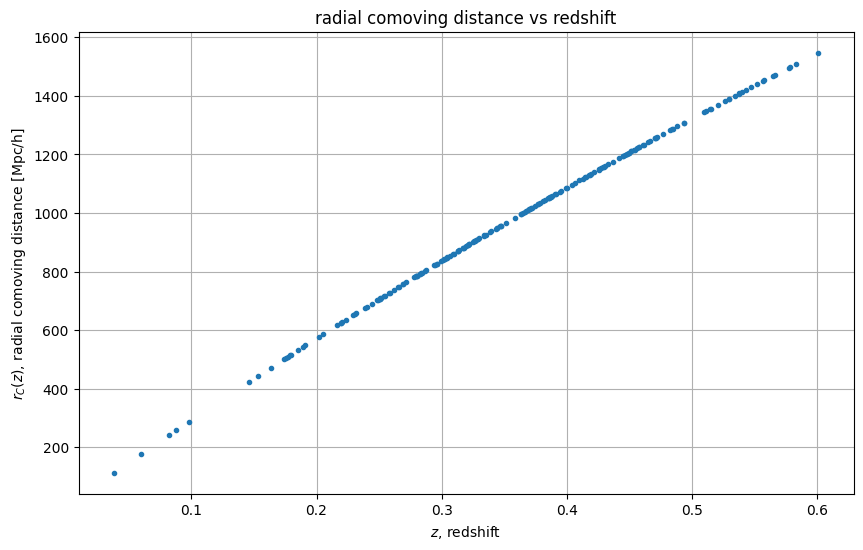

In [13]:
plt.figure(7,figsize=(10,6))
plt.clf()
plt.title('radial comoving distance vs redshift')
plt.plot(reds,rs,'.')
plt.grid()
plt.xlabel('$z$, redshift')
plt.ylabel('$r_C(z)$, radial comoving distance [Mpc/h]')
plt.show()

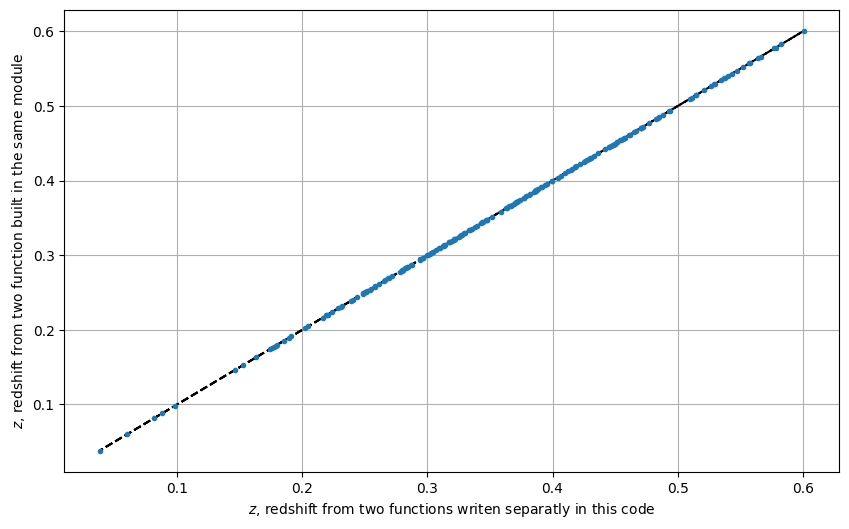

In [14]:
plt.figure(8,figsize=(10,6))
plt.clf()
plt.plot(reds,reds,'k--')
plt.plot(reds,redsd,'.')
plt.grid()
plt.xlabel('$z$, redshift from two functions writen separatly in this code')
plt.ylabel('$z$, redshift from two function built in the same module')
plt.show()